# Data and Library declarations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)



def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Guardando imagen en ", IMAGES_PATH,' ...', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

tigo_df = pd.read_csv('all_data_20220915.csv')
tigo_df['min_ttl'] = tigo_df['min_onnet'] + tigo_df['min_extnet']
tigo_df['social_days'] = tigo_df['tiktok_days'] + tigo_df['fb_days']+ tigo_df['ig_days'] + tigo_df['video_days']
tigo_validation = tigo_df[tigo_df['dataset'] == 'validation']
tigo_train = tigo_df[tigo_df['dataset'] == 'train']
tigo_test = tigo_df[tigo_df['dataset'] == 'test']

# Data Exploration

In [7]:
tigo_df.sale.value_counts()

0    465495
1     19793
Name: sale, dtype: int64

In [132]:
tigo_df.head(3)

dataset  cnsmptn_amnt     gb  banking  days_data_user  min_onnet  \
0  validation        141.67   5.25        0              29         30   
1       train        205.00  19.32        1              31        179   
2       train        163.32  10.74        0              28        155   

   min_extnet  min_int  active_data_plan  device_class  ...   ig_gb  ig_days  \
0          22        0                 0             3  ...  0.0025        1   
1         316        0                 0             1  ...  0.0000        0   
2          99        0                 1             4  ...  0.0000        0   

   video_gb  video_days  site_arpu  device_model_arpu  device_brand_arpu  \
0    0.0002           1     125.97              55.66              60.88   
1    0.0350          28      69.12              73.19              69.25   
2    0.0001           1     104.11              81.65              89.96   

   sale  min_ttl  social_days  
0     0       52            3  
1     0      495           57  
2     0      254            3  

[3 rows x 54 columns]

## Correlation Matrix

7
Guardando imagen en  ./images  ... corr_matrix


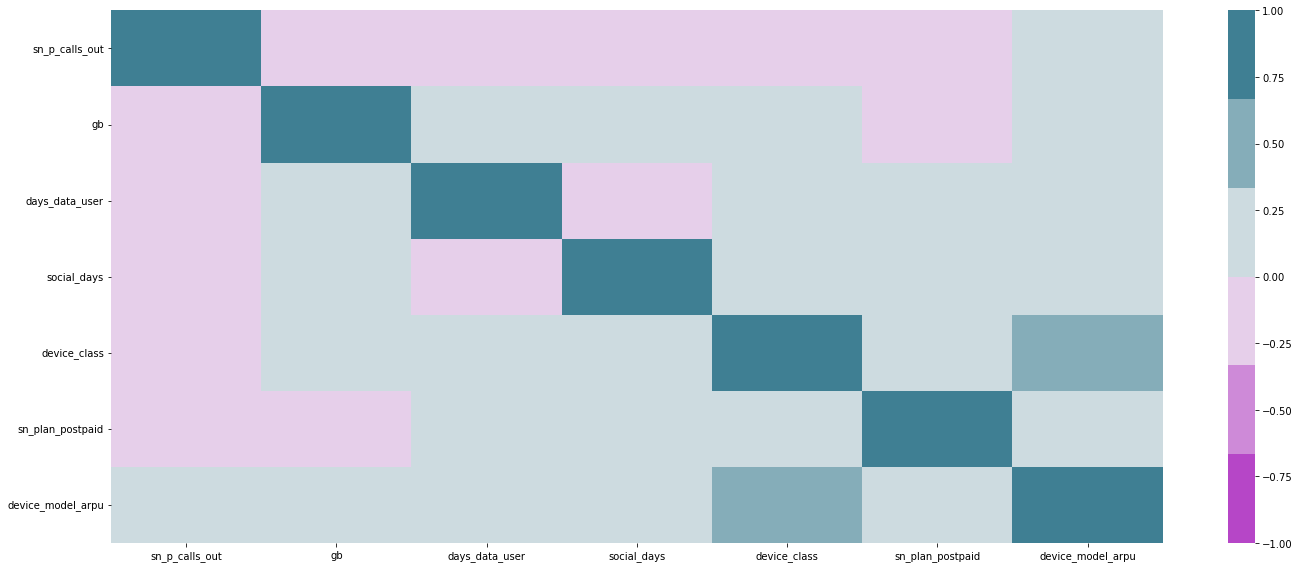

In [133]:
my_features = ['gb','calls','dys_to_fnsh_pln','sn_company_tigo','social_days',
               'actvtn_mnths','banking','min_ttl','min_int','device_class','sn_p_calls_out',
               'active_data_plan','sn_state_equals','sn_company_intl',
               'sn_contacts','days_data_user','class_ni','sn_plan_postpaid','sn_banking'
               ]

my_features = ['sn_p_calls_out','gb','days_data_user','social_days','device_class','sn_plan_postpaid','device_model_arpu']
tigo_df_corr = tigo_df[my_features]
tigo_df_corr = tigo_df_corr.corr()
tigo_df_corr
print(len(my_features))

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.heatmap(tigo_df_corr, vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(-60, 220, as_cmap=False),
                 ax=ax)

plt.tight_layout()
save_fig("corr_matrix")
plt.show()

In [77]:
tigo_train[my_features].to_excel('/Users/julio/Desktop/tigotest.xlsx')


# Feature Selection

> Setting up predictors and outcome variables

In [8]:
tigo_predictors = tigo_df
tigo_predictors = tigo_predictors.drop(columns='sale') 
tigo_predictors = tigo_predictors.drop(columns='dataset')
tigo_predictors = tigo_predictors.drop(columns='min_onnet')
tigo_predictors = tigo_predictors.drop(columns='min_extnet')
tigo_predictors = pd.Series(tigo_predictors.columns)
tigo_predictors = tigo_predictors.to_list()
predictors = tigo_predictors
outcome = 'sale'

### Sklearn SelectKBest approach

In [9]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression


# selector = SelectKBest(score_func=chi2, k=6) 
selector = SelectKBest( k=5) 
X_new = selector.fit_transform(tigo_df[predictors], tigo_df[outcome])


selected_indices = selector.get_support(indices=True)


selected_features = pd.Series([tigo_df[predictors].columns[i] for i in selected_indices])
selected_features = selected_features.to_list()
selected_features


['calls', 'sn_contacts', 'sn_plan_postpaid', 'sn_banking', 'device_model_arpu']

In [67]:
tigo_df['sale_id'] = tigo_df['sale'].astype(str)
tigo_df['sale_id'] = tigo_df['sale_id'].replace('1','S')
tigo_df['sale_id'] = tigo_df['sale_id'].replace('0','N')
tigo_df['MIN_TTL'] = tigo_df['min_onnet'] + tigo_df['min_extnet']

### Modelos

In [ ]:
from sklearn.model_selection import train_test_split
tigo_train['sale'] = tigo_train['sale'].astype(str)
tigo_train['sale'] = tigo_train['sale'].replace('1','S')
tigo_train['sale'] = tigo_train['sale'].replace('0','N')
tigo_train_set, tigo_test_set = train_test_split(tigo_train, test_size=0.935, random_state=42)
tigo_train_set, tigo_test_set = train_test_split(tigo_train_set, test_size=0.2, random_state=42)
tigo_train_set.reset_index(inplace=True,drop=True)
tigo_test_set.reset_index(inplace=True,drop=True)
tigo_test_set

# Setting datasets

In [30]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Median:", np.median(scores))
    print("Standard deviation:", scores.std())

> Se fragmente el training set porque la data es demasiado grande para procesarla rápidamente

In [ ]:
X = tigo_df
X = X.drop(columns= 'dataset')
X = X.drop(columns= 'sale')
X = X.drop(columns= 'sale_id')

y = tigo_df['sale']
y = pd.DataFrame(y)

In [163]:
tigo_train['sale_id'] = tigo_train['sale'].astype(str)
tigo_train['sale_id'] = tigo_train['sale_id'].replace('1','S')
tigo_train['sale_id'] = tigo_train['sale_id'].replace('0','N')

X_train = tigo_train
X_train = X_train.drop(columns='dataset')
X_train = X_train.drop(columns='sale')
X_train = X_train.drop(columns='sale_id')
X_train = X_train.drop(columns='min_onnet')
X_train = X_train.drop(columns='min_extnet')
y_train = tigo_train['sale_id']

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_23385/3396126580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tigo_train['sale_id'] = tigo_train['sale'].astype(str)
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_23385/3396126580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tigo_train['sale_id'] = tigo_train['sale_id'].replace('1','S')
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_23385/3396126580.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [165]:
tigo_test['sale_id'] = tigo_test['sale'].astype(str)
tigo_test['sale_id'] = tigo_test['sale_id'].replace('1','S')
tigo_test['sale_id'] = tigo_test['sale_id'].replace('0','N')

X_test = tigo_test
X_test = X_test.drop(columns='dataset')
X_test = X_test.drop(columns='sale')
X_test = X_test.drop(columns='sale_id')
X_test = X_test.drop(columns='min_onnet')
X_test = X_test.drop(columns='min_extnet')
y_test = tigo_test['sale_id']

/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_23385/3784019763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tigo_test['sale_id'] = tigo_test['sale'].astype(str)
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_23385/3784019763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tigo_test['sale_id'] = tigo_test['sale_id'].replace('1','S')
/var/folders/8m/h3fvb1b56j5fn1slpd923kzc0000gn/T/ipykernel_23385/3784019763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [134]:

#Predictors
tigo_train_predictors = X_train[selected_features]
tigo_test_predictors = X_test[selected_features]
tigo_train_predictors_mf = X_train[my_features]
tigo_test_predictors_mf = X_test[my_features]

#Outcomes
tigo_train_outcome = y_train
tigo_test_outcome = y_test
tigo_train_outcome.reset_index(inplace=True,drop=True)
tigo_test_predictors.reset_index(inplace=True,drop=True)


In [654]:
tigo_test[my_features].to_excel('/Users/julio/Desktop/tigo_test.xlsx')

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# tigo_train_predictors_num = tigo_train_predictors.drop("banking", axis=1)
# tigo_train_predictors_cat = tigo_train_predictors['banking'].astype(str)
# tigo_train_predictors_cat = tigo_train_predictors_cat.replace('1','S')
# tigo_train_predictors_cat = tigo_train_predictors_cat.replace('0','N')


num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])


tigo_train_predictors_num_tr = num_pipeline.fit_transform(tigo_train_predictors)


num_attribs = list(tigo_train_predictors_mf)
cat_attributes = ['banking']
full_pipeline = ColumnTransformer([
    ("num", num_pipeline , num_attribs),
    # ("cat", OneHotEncoder(), cat_attributes)
])

# tigo_train_prepared = full_pipeline.fit_transform(tigo_train_predictors)
# tigo_test_prepared = full_pipeline.fit_transform(tigo_test_predictors)
tigo_train_prepared_mf_std = full_pipeline.fit_transform(tigo_train_predictors_mf)
tigo_test_prepared_mf_std = full_pipeline.fit_transform(tigo_test_predictors_mf)

# Random Forest

## Classifier

### With Selected Features

In [149]:
from sklearn.ensemble import RandomForestClassifier

X = tigo_train_predictors_mf
y = tigo_train_outcome
# X = tigo_train[my_features]
# y = tigo_train['sale']

rf = RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True)
rf.fit(X, y)
# print(rf.oob_decision_function_)
rf_prediction = rf.predict(X)
rf_prediction = pd.DataFrame(rf_prediction,columns={'prediction'})
rf_prediction.value_counts()

prediction
N             340275
S              13436
dtype: int64

In [150]:
tigo_train.sale_id.value_counts()

N    339377
S     14334
Name: sale_id, dtype: int64

#### Scores

In [151]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, tigo_train['sale'],
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [0.20722831 0.20647953 0.20709477 0.20661641 0.20750391 0.20716301
 0.20661641 0.20784425 0.20634256 0.20716301]
Mean: 0.2070052156171204
Median: 0.2071288885925996
Standard deviation: 0.00045585728189236155


#### Confusion Matrix

In [769]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_predict = cross_val_predict(rf, tigo_train_predictors, tigo_train['sale'], cv=3)
confusion_matrix(tigo_train['sale'],y_train_predict)

array([[338839,    538],
       [ 14334,      0]])

### My Features

In [160]:
from sklearn.ensemble import RandomForestClassifier

X = tigo_train_predictors_mf
y = tigo_train_outcome

rf = RandomForestClassifier(n_estimators=500, random_state=1, oob_score=True)
rf.fit(X, y)
# print(rf.oob_decision_function_)
rf_prediction_test = rf.predict(tigo_test_predictors_mf)
rf_prediction_test = pd.DataFrame(rf_prediction_test,columns={'prediction'})
rf_prediction_test.value_counts()

prediction
N             68742
S                 1
dtype: int64

In [161]:
rf_prediction_train = rf.predict(X)
rf_prediction_train = pd.DataFrame(rf_prediction_train,columns={'prediction'})
rf_prediction_train.value_counts()

prediction
N             340347
S              13364
dtype: int64

In [360]:
tigo_test.sale_id.value_counts()

N    65774
S     2969
Name: sale_id, dtype: int64

#### Scores

In [162]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, tigo_train['sale'],
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [0.20695528 0.20647953 0.20709477 0.20661641 0.20764011 0.20716301
 0.20647953 0.20777622 0.20627404 0.20716301]
Mean: 0.20696419115105247
Median: 0.2070250219694532
Standard deviation: 0.0004774417502911379


In [335]:
display_scores(rf_rmse_scores)

Scores: [0.20579087 0.20531239 0.20593111 0.2055876  0.20613694 0.20593111
 0.2050368  0.20593111 0.20489887 0.20565635]
Mean: 0.20562131473721
Median: 0.20572360983350407
Standard deviation: 0.000392927863995551


#### Confusion Matix

In [767]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_predict = cross_val_predict(rf, X, tigo_train['sale'], cv=3)
confusion_matrix(tigo_train['sale'],y_train_predict)

array([[338769,    608],
       [ 14333,      1]])

In [158]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_predict = cross_val_predict(rf, tigo_test_predictors_mf, tigo_test['sale'], cv=3)
y_train_predict = cross_val_predict(rf, X, tigo_train['sale'], cv=3)
print('TRAIN CM: \n' + str(confusion_matrix(tigo_train['sale'],y_train_predict)))
print('TEST CM: \n' + str(confusion_matrix(tigo_test['sale'],y_test_predict)))

TRAIN CM: 
[[338743    634]
 [ 14334      0]]
TEST CM: 
[[65677    97]
 [ 2969     0]]


#### F1 Score

In [153]:
from sklearn.metrics import f1_score

f1_score(tigo_train['sale'],y_train_predict)

0.0043907793633369925

In [154]:
from sklearn.metrics import precision_score, recall_score
print('Precision: '+str(precision_score(tigo_train['sale'],y_train_predict)))
print('Recall: '+str(recall_score(tigo_train['sale'],y_train_predict)))

Precision: 0.029488291413703384
Recall: 0.0023719826984791403


# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

X = tigo_train_predictors_mf
# X = tigo_train_prepared
y = tigo_train_outcome

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

/Users/julio/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [143]:
results = pd.DataFrame(log_reg.predict(tigo_test_predictors_mf))
results.value_counts()

N    68743
dtype: int64

# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

X = tigo_train_predictors
y = tigo_train_outcome

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'log'],
}

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5)
grid_search.fit(X, y)

grid_search.predict(tigo_test_predictors_mf)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [145]:
from sklearn.linear_model import SGDClassifier
# X = tigo_train_prepared
X = tigo_train_predictors_mf
y = tigo_train_outcome

sgd_clf = SGDClassifier(max_iter=3000, tol=1e-3, random_state=42, alpha=0.0001, loss='log', penalty='l1')
sgd_clf.fit(X, y)
sgd_predict = sgd_clf.predict(X)
sgd_predict = pd.DataFrame(sgd_predict)
sgd_predict[0].value_counts()

N    353711
Name: 0, dtype: int64

In [850]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X, y, cv=3, scoring="accuracy")

array([0.95872914, 0.95881395, 0.9594582 ])

In [852]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X, y, cv=3)
y_train_pred

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')

In [851]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_train_pred)

array([[339199,    178],
       [ 14324,     10]])

In [853]:
y_scores = cross_val_predict(sgd_clf,X,y,cv=3,method="decision_function")
y_scores

array([-190.50514804, -124.06358875, -192.62466357, ...,  -74.88095818,
       -239.89242714,  -77.78822647])

In [855]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, y_scores, pos_label='S')


# Decision Tree

> Function for MSE Evaluation

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Median:", np.median(scores))
    print("Standard deviation:", scores.std())

## With Selected Features

In [164]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# X = tigo_train_predictors
X = X_train
y = tigo_train_outcome

tree_clf_f = DecisionTreeClassifier(max_depth=50, random_state=42,criterion='entropy')
tree_clf_f.fit(X, y)
tree_predict = tree_clf_f.predict(X)
tree_predict = pd.DataFrame(tree_predict)
tree_predict.value_counts()

N    339468
S     14243
dtype: int64

### Scores

In [167]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf_f, X, tigo_train['sale'],
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.28484667 0.28280873 0.28524742 0.28415509 0.28800922 0.28574256
 0.28380664 0.28991707 0.28589093 0.28628622]
Mean: 0.28567105262918635
Median: 0.2854949882498582
Standard deviation: 0.001968596671361331


Scores: [0.22102534 0.21955257 0.21748249 0.22058032 0.22217667 0.21980996
 0.22134801 0.22160331 0.21890777 0.22192202]
Mean: 0.22044084567573335
Median: 0.22080282928585512
Standard deviation: 0.001415328147706576


In [166]:
tree_prediction = tree_clf_f.predict(X_test)
tree_prediction = pd.DataFrame(tree_prediction)
tree_prediction.value_counts()

N    64940
S     3803
dtype: int64

In [168]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_predict = cross_val_predict(tree_clf_f, X_test, tigo_test['sale'], cv=3)
y_train_predict = cross_val_predict(tree_clf_f, X, tigo_train['sale'], cv=3)
print('TRAIN CM: \n' + str(confusion_matrix(tigo_train['sale'],y_train_predict)))
print('TEST CM: \n' + str(confusion_matrix(tigo_test['sale'],y_test_predict)))

TRAIN CM: 
[[323778  15599]
 [ 13435    899]]
TEST CM: 
[[62547  3227]
 [ 2786   183]]


## With My Features

In [91]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = tigo_train_predictors_mf
y = tigo_train_outcome

# Define the parameter grid

param_grid = {
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30, 50]
}

# Create the DecisionTreeClassifier
tree_clf_mf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(tree_clf_mf, param_grid, cv=5)
grid_search.fit(X, y)
tree_clf_mf_predictions = grid_search.predict(X)
# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

tree_clf_mf_predictions = pd.DataFrame(tree_clf_mf_predictions)
tree_clf_mf_predictions.value_counts()


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: 0.959475390933188


N    353711
dtype: int64

In [135]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

X = tigo_train_predictors_mf
# X = tigo_train_prepared_mf_std
y = tigo_train_outcome

tree_clf_mf = DecisionTreeClassifier(max_depth=100,
                                     random_state=42,criterion='entropy')
tree_clf_mf.fit(X, y)

tree_clf_mf_predictions = tree_clf_mf.predict(tigo_train_predictors_mf)
tree_clf_mf_predictions_test = tree_clf_mf.predict(tigo_test_predictors_mf)
# tree_clf_mf_predictions = tree_clf_mf.predict(tigo_train_prepared_mf_std)
tree_clf_mf_predictions = pd.DataFrame(tree_clf_mf_predictions)
tree_clf_mf_predictions_test = pd.DataFrame(tree_clf_mf_predictions_test)
print('train \n' + str(tree_clf_mf_predictions.value_counts()))
print('test \n' + str(tree_clf_mf_predictions_test.value_counts()))

train 
N    340353
S     13358
dtype: int64
test 
N    64556
S     4187
dtype: int64


In [685]:
tigo_train['sale_id'].value_counts()

N    339377
S     14334
Name: sale_id, dtype: int64

In [90]:
tigo_test['sale_id'].value_counts()

N    65774
S     2969
Name: sale_id, dtype: int64

#### tree graph

In [ ]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
        tree_clf_mf,
        out_file=os.path.join('./', "iris_tree.dot"),
        feature_names=my_features,
        class_names=tigo_train.sale_id,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join('./', "iris_tree.dot"))

### Scores

In [127]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf_mf, X, tigo_train['sale'],
                         scoring="neg_mean_squared_error", cv=10)
tree_clf_rmse_scores = np.sqrt(-scores)

In [128]:
display_scores(tree_clf_rmse_scores)

Scores: [0.28981544 0.28825452 0.29277968 0.28608864 0.29050158 0.28942907
 0.29118203 0.28480106 0.28781282 0.2887445 ]
Mean: 0.28894093426638723
Median: 0.2890867863655941
Standard deviation: 0.0022417316021099976


### Confusion Matrix

#### Normal

In [136]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_predict = cross_val_predict(tree_clf_mf, tigo_test_predictors_mf, tigo_test['sale'], cv=3)
y_train_predict = cross_val_predict(tree_clf_mf, X, tigo_train['sale'], cv=3)
print('TRAIN CM: \n' + str(confusion_matrix(tigo_train['sale'],y_train_predict)))
print('TEST CM: \n' + str(confusion_matrix(tigo_test['sale'],y_test_predict)))

TRAIN CM: 
[[323250  16127]
 [ 13556    778]]
TEST CM: 
[[62499  3275]
 [ 2810   159]]


#### Standarad

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_predict = cross_val_predict(tree_clf_mf, tigo_test_prepared_mf_std, tigo_test['sale'], cv=3)
y_train_predict = cross_val_predict(tree_clf_mf, X, tigo_train['sale'], cv=3)
print('TRAIN CM: \n' + str(confusion_matrix(tigo_train['sale'],y_train_predict)))
print('TEST CM: \n' + str(confusion_matrix(tigo_test['sale'],y_test_predict)))

TRAIN CM: 
[[323258  16119]
 [ 13585    749]]
TEST CM: 
[[62490  3284]
 [ 2806   163]]


In [638]:
tigo_test.sale_id.value_counts()

N    65774
S     2969
Name: sale_id, dtype: int64

### F1 score

In [117]:
from sklearn.metrics import f1_score

f1_score(tigo_train['sale'],y_train_predict)

0.05238759036535157

In [131]:
from sklearn.metrics import precision_score, recall_score
print('Precision: '+str(precision_score(tigo_train['sale'],y_train_predict)))
print('Recall: '+str(recall_score(tigo_train['sale'],y_train_predict)))

Precision: 0.04893114515836008
Recall: 0.05636947118738663


# XGBoost

## With My Features

In [137]:
from xgboost import XGBClassifier

X = tigo_train_predictors_mf
y = tigo_train['sale']

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=100,
                            reg_lambda=0, learning_rate=0.3, subsample=1,
                            use_label_encoder=False, eval_metric='error')

xgb_default.fit(X, y)
# print(xgb_default.fit(X, y))
xgb_prediction = xgb_default.predict(tigo_test_predictors_mf)
xgb_prediction = pd.DataFrame(xgb_prediction,columns={'prediction'})
xgb_prediction.value_counts()

prediction
0             68551
1               192
dtype: int64

In [159]:
xgb_prediction = xgb_default.predict(X)
xgb_prediction = pd.DataFrame(xgb_prediction,columns={'prediction'})
xgb_prediction.value_counts()

prediction
0             340035
1              13676
dtype: int64

### Scores

In [450]:
from sklearn.model_selection import cross_val_score, accuracy_score

scores = cross_val_score(xgb_default, X,y,
                         scoring="neg_mean_squared_error", cv=3)
xgb_clf_rmse_scores = np.sqrt(-scores)

In [571]:
display_scores(xgb_clf_rmse_scores)

Scores: [0.20671158 0.20706005 0.20628119]
Mean: 0.20668427267528133
Median: 0.2067115826034255
Standard deviation: 0.00031855437235594716


### Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score

y_test_predict = cross_val_predict(xgb_default,X , tigo_train['sale'], cv=3)
accuracy = accuracy_score(tigo_train['sale'], y_test_predict)
print(accuracy)
confusion_matrix(tigo_train['sale'],y_test_predict)

In [140]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_predict = cross_val_predict(xgb_default, tigo_test_predictors_mf, tigo_test['sale'], cv=3)
y_train_predict = cross_val_predict(xgb_default, X, tigo_train['sale'], cv=3)
print('TRAIN CM: \n' + str(confusion_matrix(tigo_train['sale'],y_train_predict)))
print('TEST CM: \n' + str(confusion_matrix(tigo_test['sale'],y_test_predict)))

TRAIN CM: 
[[338258   1119]
 [ 14300     34]]
TEST CM: 
[[65565   209]
 [ 2962     7]]


In [460]:
tigo_test.sale_id.value_counts()

N    65774
S     2969
Name: sale_id, dtype: int64

### Scores

In [146]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_default, X, tigo_train['sale'],
                         scoring="neg_mean_squared_error", cv=3)
xgb_clf_rmse_scores = np.sqrt(-scores)
display_scores(xgb_clf_rmse_scores)

Scores: [0.20840739 0.20942234 0.20853033]
Mean: 0.20878668591739627
Median: 0.20853033017546627
Standard deviation: 0.0004522658426104768


### F1 Score

In [147]:
from sklearn.metrics import f1_score

f1_score(tigo_train['sale'],y_train_predict)

0.0043907793633369925

In [148]:
from sklearn.metrics import precision_score, recall_score
print('Precision: '+str(precision_score(tigo_train['sale'],y_train_predict)))
print('Recall: '+str(recall_score(tigo_train['sale'],y_train_predict)))

Precision: 0.029488291413703384
Recall: 0.0023719826984791403
